<a href="https://colab.research.google.com/github/athai16/codepath-prework/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 3

## Outline

Repeat exercises from Lab 2, but with the *SuperStore Retail Orders* dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [102]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [103]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders.csv')

print (df)

Mounted at /content/gdrive
      customer_id      customer_name          address_line_1          city  \
0              67      Gordy Matteau     59 Northland Circle    Wilmington   
1             201     Cort Paskerful         769 Buell Drive    Huntsville   
2              45    Willetta Lumley       41 Ridgeway Alley        Irvine   
3             106   Alison Batterton           489 Erie Hill      Richmond   
4             357  Martelle Paxeford    451 Manitowish Place      Richmond   
...           ...                ...                     ...           ...   
9564          637  Jayson Andriessen  0819 Crownhardt Circle     Allentown   
9565          370    Darby Tesseyman     7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari      89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne    9630 Washington Hill     Watertown   
9568          482       Matelda Bull      6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  o

## Prepare Data

➡️ Assignment Tasks
- Convert the Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [104]:
#convert the total_amount into a number (not a string)

df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True))

df = df.dropna()

print (df)

      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

In [105]:
#remove rows with empty (NULL) values

df_cleaned = df.dropna()

print(df_cleaned)

      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

## Summarize Data

➡️ Assignment Tasks
- Display the average price per month
- Display the total revenue for all months

In [106]:
#display the average price per month

#convert the product_price into a number (not a string)

df['product_price'] = pd.to_numeric(df['product_price'].replace('[\$,]', '', regex=True))

df = df.dropna()

print (df)

      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

In [107]:
# remove space after name of month in order_month

df['order_month'] = df['order_month'].str.replace(' ', '')

print(df['order_month'])

0         January
1        November
2       September
3        December
4            June
          ...    
9561        March
9565         June
9566          May
9567        April
9568        March
Name: order_month, Length: 8981, dtype: object


In [108]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/superstore_retail_orders.csv')

# convert product_price to numeric
df['product_price'] = pd.to_numeric(df['product_price'].replace('[\$,]', '', regex=True))


In [109]:
# group by order_month and calculate average price
average_price_per_month = df.groupby('order_month')['product_price'].mean()

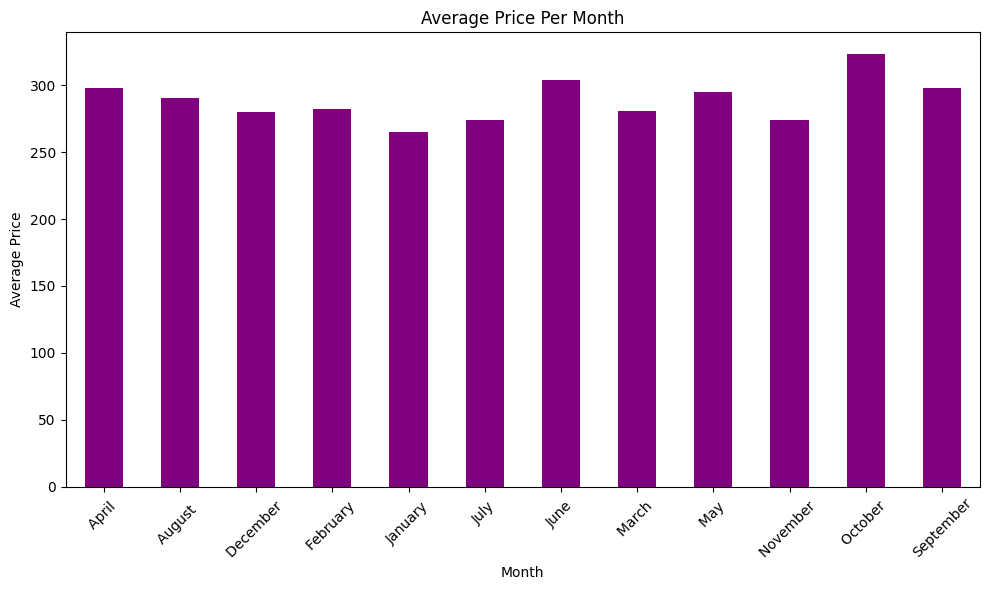

In [110]:
# bar chart
plt.figure(figsize=(10, 6))
average_price_per_month.plot(kind='bar', color='purple')
plt.title('Average Price Per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
#display total revenue for all months
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/superstore_retail_orders.csv')

df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True))


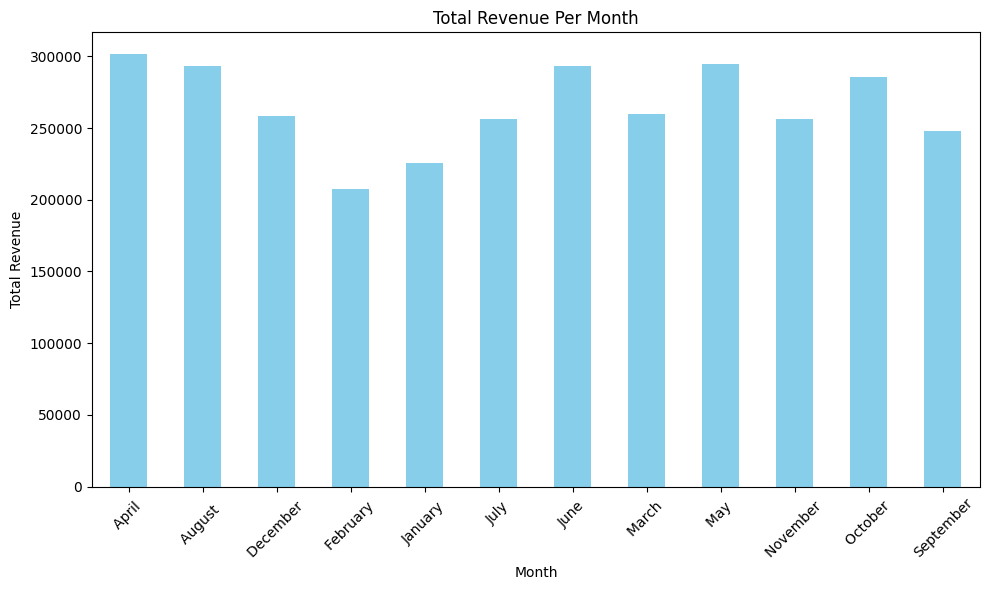

In [112]:
#calculate total revenue for each month
total_revenue_per_month = df.groupby('order_month')['total_amount'].sum()

#bar graph
plt.figure(figsize=(10, 6))
total_revenue_per_month.plot(kind='bar', color='skyblue')
plt.title('Total Revenue Per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()